In [1]:
#hide
from utils import *

hc("F$0$-Conditioned Speech Sythesis")

## Motivation

## AIM

To build a system that takes speech signal, an intended F0 contour as inputs and outputs synthesized speech with the new F0 contour.

## WORLD

*WORLD* is free software for high-quality speech analysis, manipulation and synthesis. It can estimate Fundamental frequency (F0), aperiodicity and spectral envelope and also generate the speech like input speech with only estimated parameters.

We can manipulate the F0 during synthesis to get our desired output speech.

## Testing with Default Paramters

In [5]:
import pyworld as pw
import modusa as ms
import numpy as np

In [6]:
# Load a speech signal
y, sr, title = ms.load("../../../data/fsm-snd/Crocodile 1.mp3", sr=16000, clip=5)
ann = ms.load_ann("../../../data/fsm-snd/Crocodile 1-words.txt", clip=5)

In [7]:
#hide
def compute_spec(y, sr):
    """
    Compute log-compressed power spectrogram.

    Parameters
    ----------
    y: ndarray
        - Audio signal.
    sr: float | int
        - Sampling rate of the audio signal.
    """
    import librosa
    
    N, H = 1024, 160
    S = librosa.stft(y, n_fft=N, win_length=N, hop_length=H)
    S = np.log(1 + 10*(np.abs(S)**2))
    S_f = np.arange(S.shape[0]) * (sr / N)
    S_t = np.arange(S.shape[1]) * (H / sr)

    return S, S_f, S_t

In [34]:
_f0, t = pw.dio(y, sr)    # raw pitch extractor
f0 = pw.stonemask(y, _f0, t, sr)  # pitch refinement
sp = pw.cheaptrick(y, f0, t, sr)  # extract smoothed spectrogram
ap = pw.d4c(y, f0, t, sr)         # extract aperiodicity

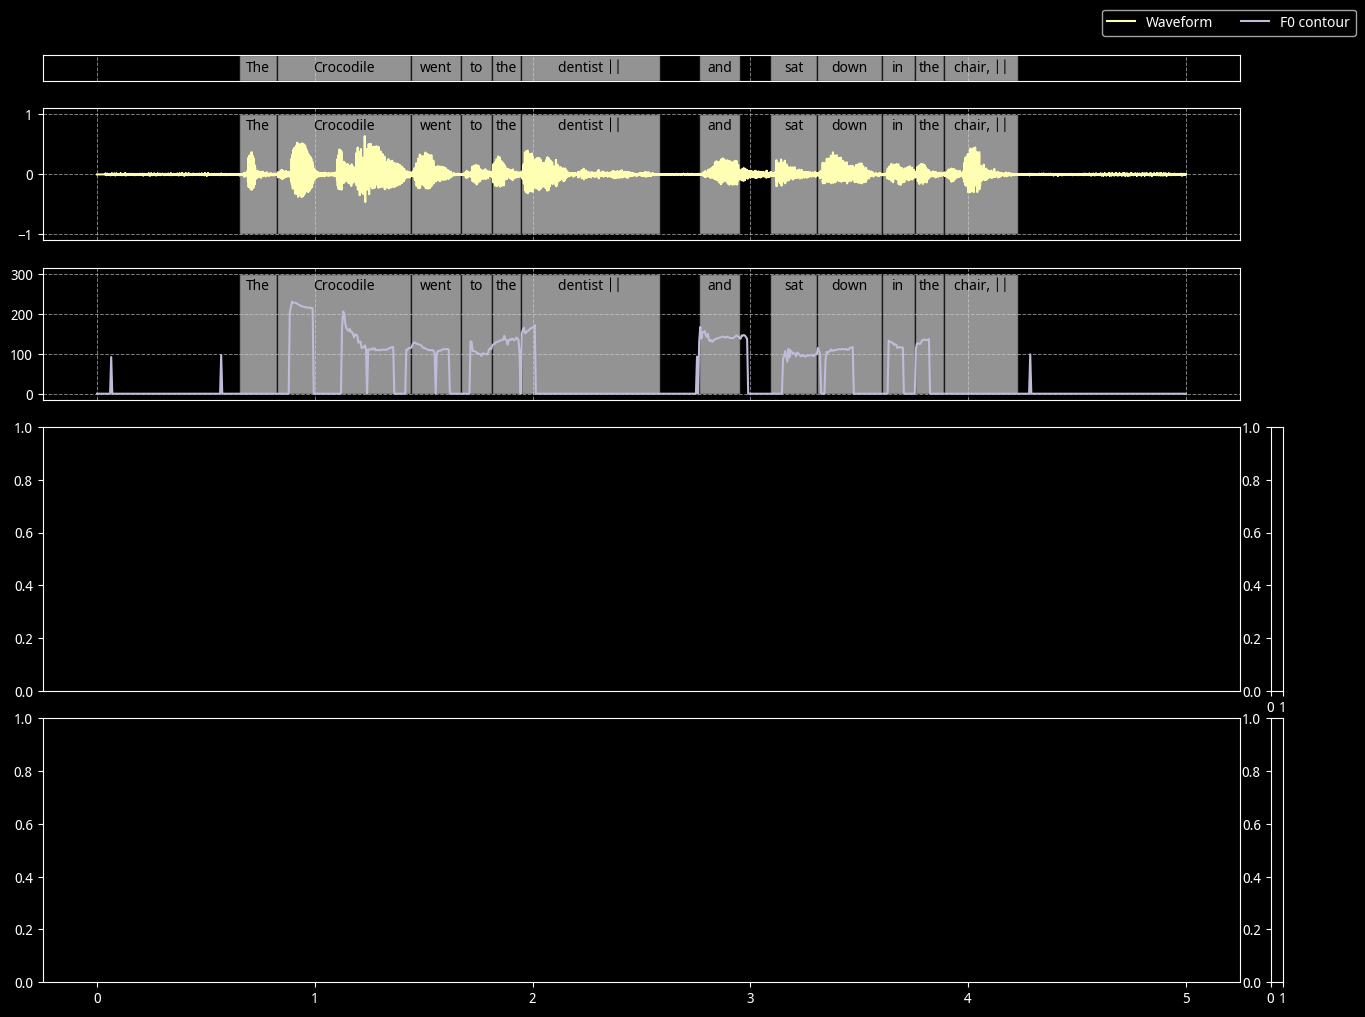

In [36]:
fig = ms.fig("assmm")
fig.add_annotation(ann)

fig.add_signal(y, np.arange(y.size) / sr, label="Waveform")
fig.add_annotation(ann, ax=2, ylim=(-1, 1), text_loc="t")

fig.add_signal(f0, t, label="F0 contour")
fig.add_annotation(ann, ax=3, ylim=(0, 300), text_loc="t")

fig.add_legend(0.9)

## Using Havest for Pitch Estimation

In [33]:
_f0, t = pw.harvest(y, sr)    # pitch extractor using harvest method
f0 = pw.stonemask(y, _f0, t, sr)  # pitch refinement
sp = pw.cheaptrick(y, f0, t, sr)  # extract smoothed spectrogram
ap = pw.d4c(y, f0, t, sr)         # extract aperiodicity

In [ ]:
fig.add_matrix(sp.T, np.arange(sp.T.shape[0]), t, o="lower", label="Harmonic envelope")
fig.add_annotation(ann, ylim=(400, sp.shape[1]), text_loc="m", ax=4)

fig.add_matrix(ap.T, np.arange(ap.T.shape[0]), t, o="lower", label="Aperiodic envelope")
fig.add_annotation(ann, ylim=(400, ap.shape[1]), text_loc="m", ax=5)

In [ ]:
y_synth = pw.synthesize(f0, sp, ap, sr) # synthesize an utterance using the parameters

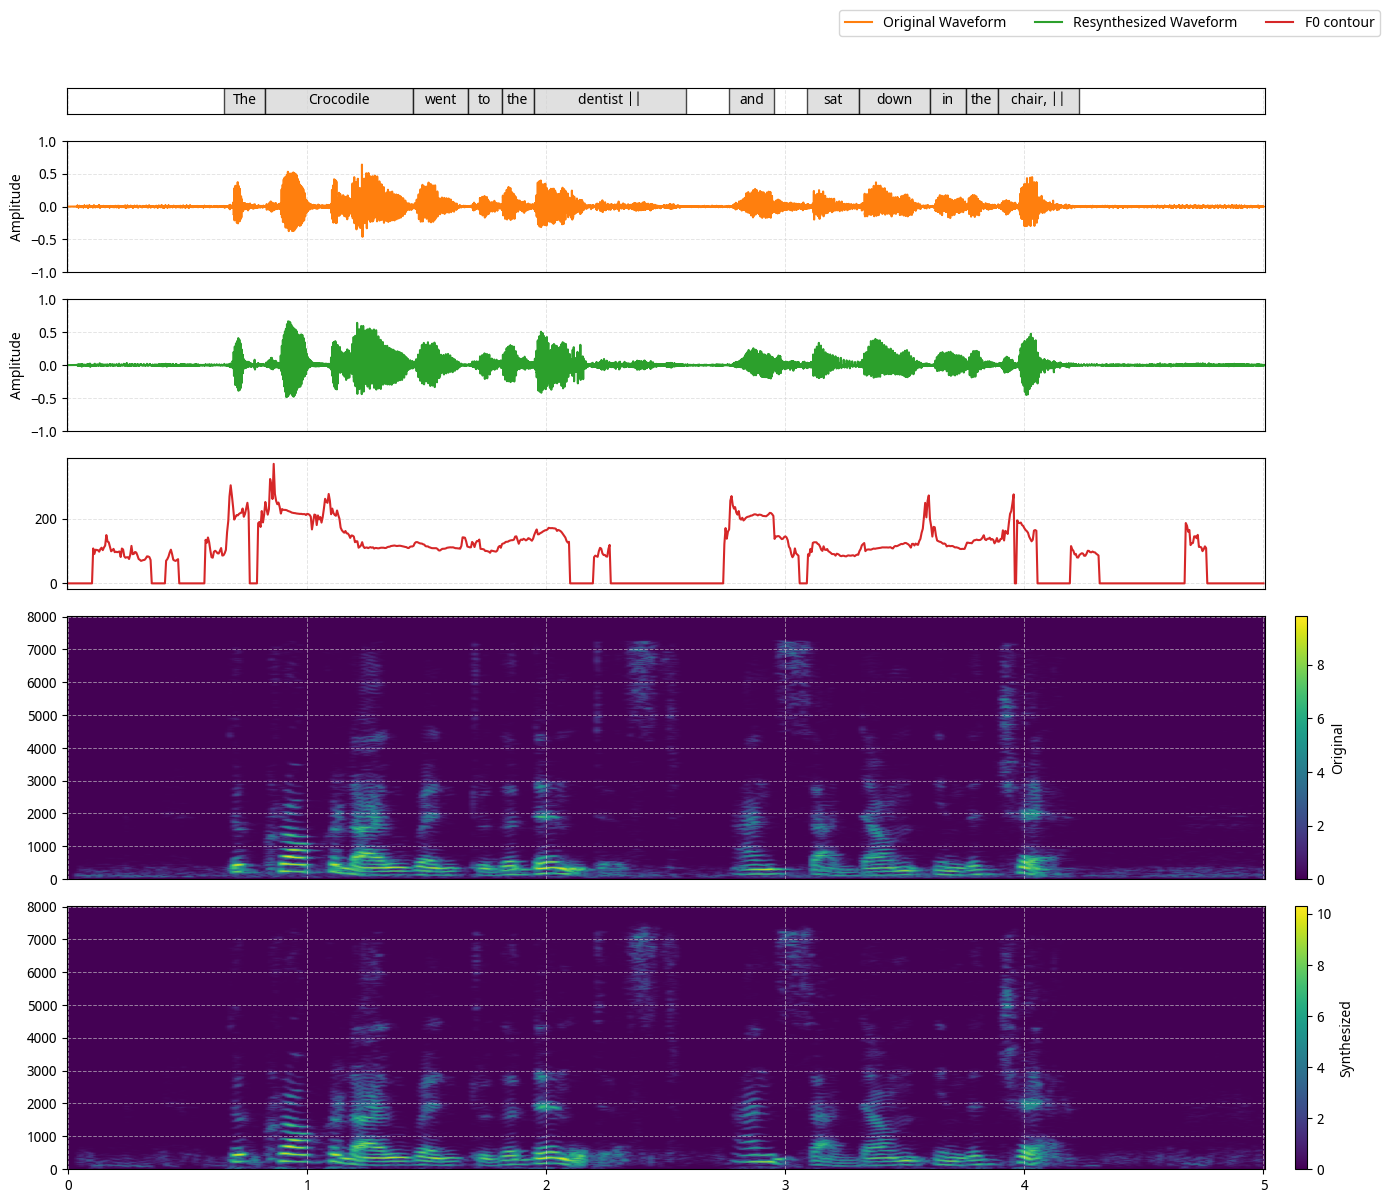

In [10]:
fig = ms.fig("asssmm", dark_mode=False)
fig.add_annotation(ann)
fig.add_signal(y, np.arange(y.size) / sr, label="Original Waveform", ylabel="Amplitude", ylim=(-1, 1), ax=2)
fig.add_signal(y_synth, np.arange(y_synth.size) / sr, label="Resynthesized Waveform", ylabel="Amplitude", ylim=(-1, 1), ax=3)
fig.add_signal(f0, t, label="F0 contour", ax=4)
fig.add_matrix(*compute_spec(y, sr), ax=5, o="lower", label="Original")
fig.add_matrix(*compute_spec(y_synth, sr), ax=6, o="lower", label="Synthesized")
fig.add_legend(0.92)

In [9]:
display(ms.play(y, sr, title="Original"))
display(ms.play(y_synth, sr, title="Synthesized"))

In [ ]:
start = ann[6][0]
end = ann[6][1]
w_and = np.where((t > start) & (t < end))[0]

start = ann[7][0]
end = ann[7][1]
w_sat = np.where((t > start) & (t < end))[0]

## Pipeline

In [218]:
t.shape, sp.T.shape

((1001,), (513, 1001))

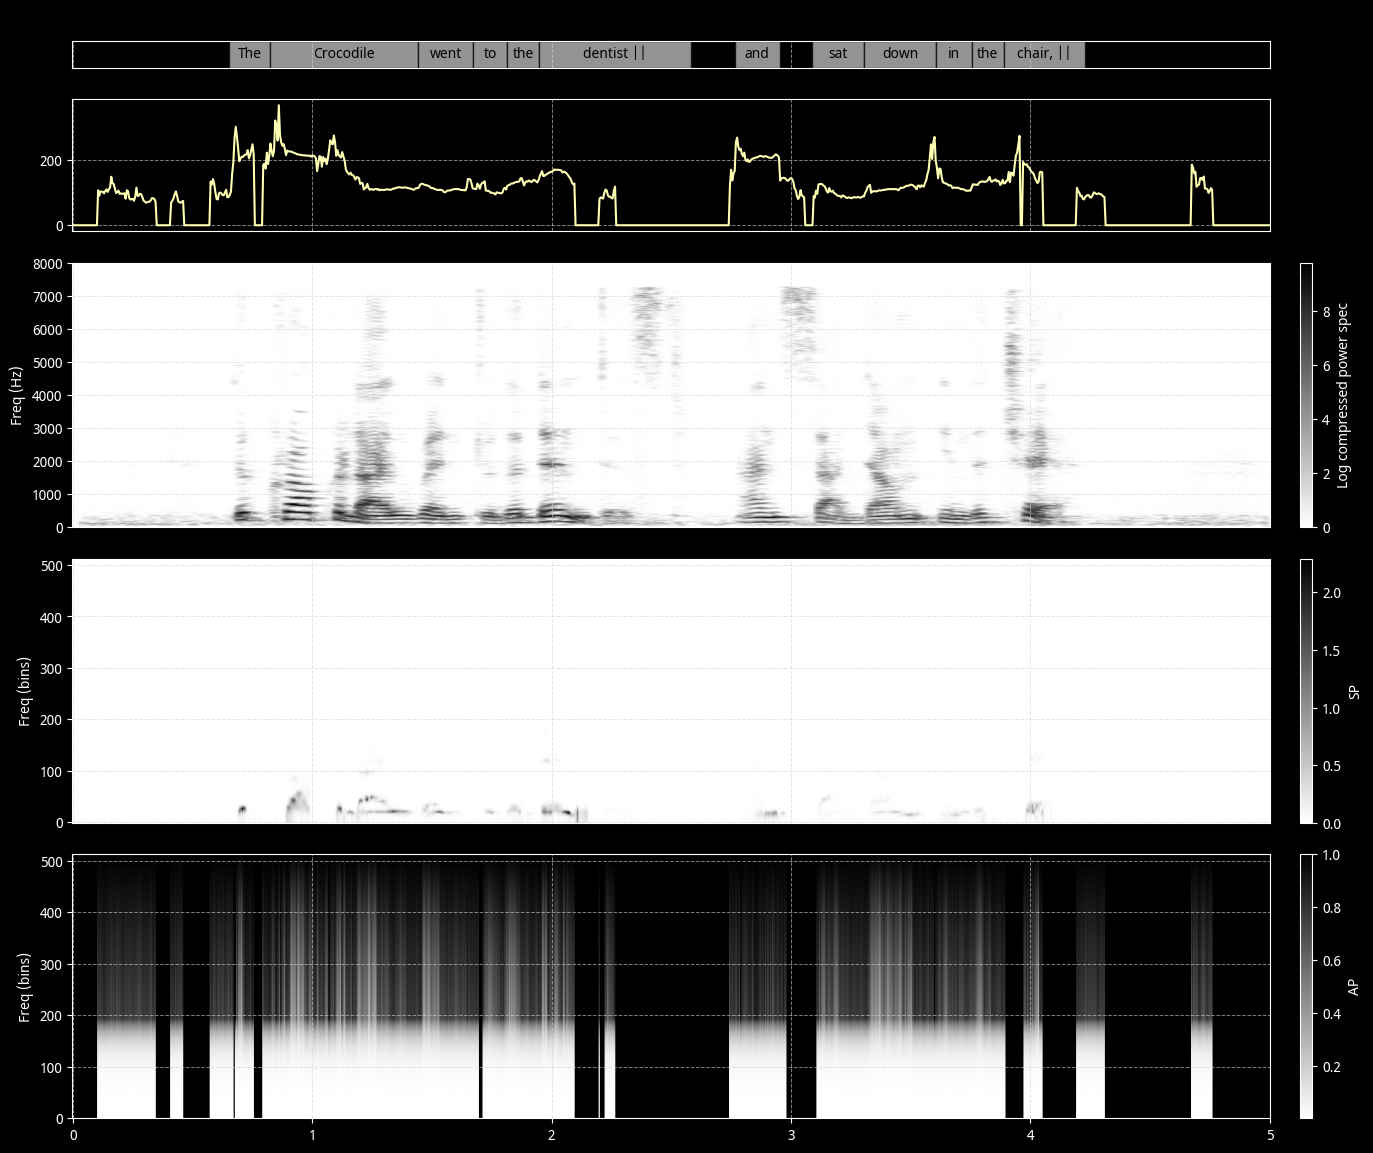

In [223]:
fig = ms.fig("asmmm")
fig.add_annotation(ann)
fig.add_signal(f0, t)
fig.add_matrix(*compute_spec(y, sr), ylabel="Freq (Hz)", o="lower", label="Log compressed power spec")
fig.add_matrix(sp.T, np.arange(sp.T.shape[0]), t, ylabel="Freq (bins)", o="lower", label="SP")
fig.add_matrix(ap.T, np.arange(ap.T.shape[0]), t, ylabel="Freq (bins)", o="lower", label="AP")

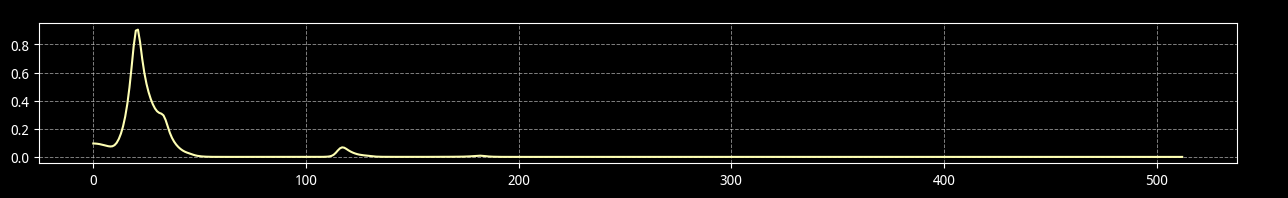

In [227]:
fig = ms.fig("s")
fig.add_signal(sp.T[:,400])

In [180]:
display(ms.play(y, sr, title="Original"))
display(ms.play(y_synth, sr, title="Synthesized"))

In [124]:
display(ms.play(y, sr, title="Original"))
display(ms.play(y_synth, sr, title="Synthesized"))

In [27]:
np.dot(y, y_synth)

ValueError: shapes (80000,) and (80080,) not aligned: 80000 (dim 0) != 80080 (dim 0)